In [1]:
import torch
import numpy as np
import pandas as pd

from neuralforecast.losses.pytorch import GMM, PMM

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

import seaborn as sns
# sns.set_style(style="whitegrid")
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

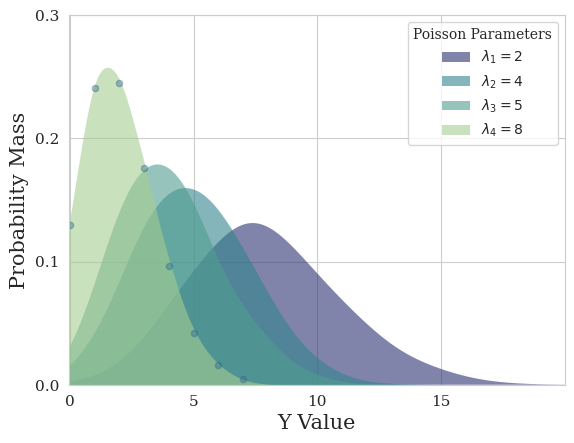

In [3]:
np.random.seed(1)

def sample_poisson_mixtures(lam, wgts, n_sample):
    ks_count = np.squeeze(np.random.multinomial(n_sample, wgts, size=1))
    
    poisson_list = []
    ks_list = []
    for idx in range(len(wgts)):
        poissons = np.random.poisson(lam[idx], size=ks_count[idx])
        ks = np.array([lam[idx]]*ks_count[idx])
        
        poisson_list.append(poissons)
        ks_list.append(ks)
    
    pmm_sample = np.concatenate(poisson_list)
    k_sample = np.concatenate(ks_list)
    pmm_df = pd.DataFrame.from_dict({'Count': pmm_sample,
                                     'Lambda': k_sample})
    return pmm_df

wgts = [0.25]*4
lam = [2, 4, 5, 8]
n_sample = 8000
pmm_df = sample_poisson_mixtures(lam, wgts, n_sample)


sns.kdeplot(data=pmm_df, x="Count", hue="Lambda",
            fill=True, common_norm=False, palette="crest",
            alpha=.6, linewidth=0, bw_adjust=2)

mass_x = np.array([0,       1,    2,    3,    4,  5,    6, 7])
mass_y = np.array([0.13, 0.241, 0.245, 0.176, 0.096, 0.042, 0.016, 0.005])
plt.scatter(mass_x, mass_y, alpha=0.4, color='#2D6B8F', s=20)
# plt.vlines(x=mass_x, ymin=np.zeros_like(mass_x), ymax=mass_y, color='#2D6B8F', alpha=0.3)

plt.xlim((-0.05, 20))
plt.xticks([0, 5, 10, 15], fontsize=11)
plt.yticks([0.0, 0.1, 0.2, 0.3], fontsize=11)

plt.legend(title=r'Poisson Parameters', 
           labels=[r'$\lambda_{1}=2$', r'$\lambda_{2}=4$', 
                   r'$\lambda_{3}=5$', r'$\lambda_{4}=8$'])
plt.xlabel('Y Value', fontsize=15)
plt.ylabel('Probability Mass', fontsize=15)

plt.savefig('./data/pmm_sample.pdf')
plt.show()
plt.close()

ks_count [1990 1974 2037 1999]
mus[idx] 3
mus[idx] 3
mus[idx] 3
mus[idx] 10


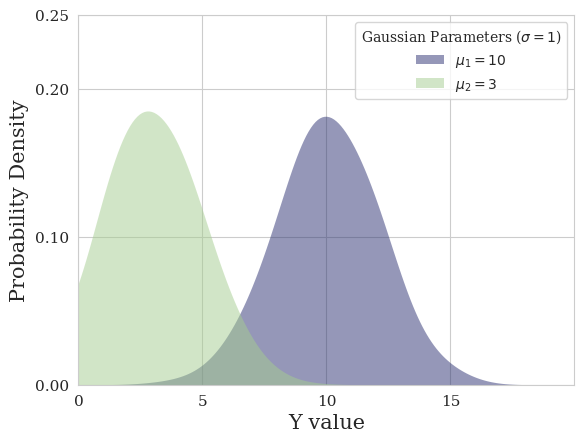

In [30]:
def sample_gaussian_mixtures(mus, wgts, n_sample):
    ks_count = np.squeeze(np.random.multinomial(n=n_sample, 
                                                pvals=wgts, size=1))
    
    print('ks_count', ks_count)
    
    samples_list = []
    ks_list = []
    for idx in range(len(wgts)):
        print('mus[idx]', mus[idx])
        samples = np.random.normal(loc=mus[idx], 
                                    scale=2*(mus[idx]/mus[idx]),
                                    size=ks_count[idx])
        ks = np.array([mus[idx]]*ks_count[idx])
        
        samples_list.append(samples)
        ks_list.append(ks)
    
    mixture_sample = np.concatenate(samples_list)
    k_sample = np.concatenate(ks_list)
    sample_df = pd.DataFrame.from_dict({'Count': mixture_sample,
                                        'Normal': k_sample})

    #pmm_df['Normal'] = pmm_df['Normal'].astype(str)
    return sample_df

wgts = [0.25]*4 #[0.33]*3
mus = [3,3,3,10] #[3, 5, 10]
n_sample = 8000
sample_df = sample_gaussian_mixtures(mus, wgts, n_sample)

# kdeplot overwrites the mixture weights
sns.kdeplot(data=sample_df, x="Count", hue="Normal",
            fill=True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0, bw_adjust=2)
plt.xlim((0, 20))
plt.xticks([0, 5, 10, 15], fontsize=11)
plt.yticks([0.0, 0.1, 0.2, 0.25], fontsize=11)
plt.legend(title=r'Gaussian Parameters ($\sigma=1$)',
           labels=[r'$\mu_{1}=10$', r'$\mu_{2}=3$', r'$\mu_{3}=10$'])
plt.xlabel('Y value', fontsize=15)
plt.ylabel('Probability Density', fontsize=15)

# plt.show()
plt.savefig('./data/gmm_sample.pdf')